# Seaborn-2



## 在多张图片中展示数据

正如之前`relplot()`中提到的，如果我们希望绘制多张分类的图像，只需要通过设定`row`和`col`参数即可。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # 导入 seaborn 并且命名为sns
sns.set(style="darkgrid") # 设置绘图格式为darkgrid
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


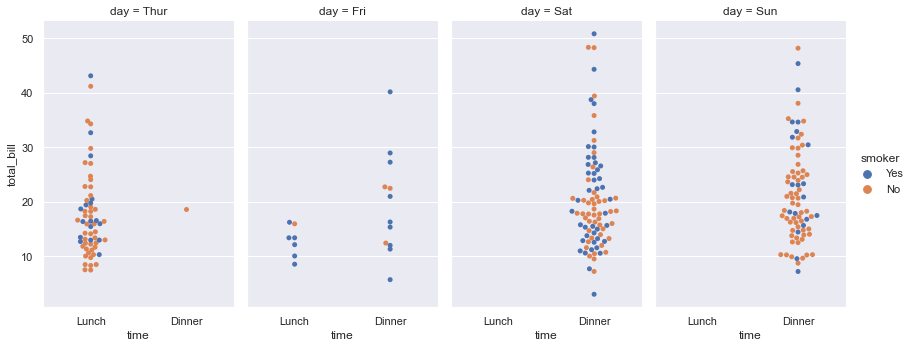

In [2]:
sns.catplot(x="time", y="total_bill", hue="smoker",
            col="day", aspect=.6,
            kind="swarm", data=tips);

## 绘制数据分布

当我们遇到一个新的数据集的时候，往往我们首先要搞清楚的就是其中每一个变量的分布。本节我们将会给大家介绍seaborn中一些用于可视化数据分布的函数。

首先我们导入`numpy`,`pandas`,`seaborn`,`pyplot`和`stats`。

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
sns.set(color_codes=True)

### 绘制单变量分布

在seaborn中，绘制单变量分布的最简单的函数是`displot()`,该函数默认返回一张频率分布直方图以及其对应的核密度估计曲线（KDE）。

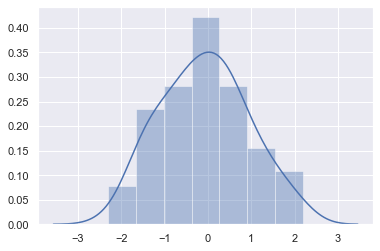

In [5]:
x = np.random.normal(size =100)
sns.distplot(x);

#### 频率分布直方图

seaborn中的频率分布直方图`displot()`和matplotlib中的`hist()`非常相似。不过，seaborn给出了更为高层次的调用方法，我们可以通过参数`kde`和`rug`控制直方图中kde估计和数据点标记的展示与否。

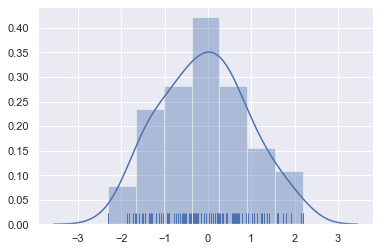

In [6]:
sns.distplot(x, kde=True, rug=True);

当绘制直方图的时候，我们经常会调整的一个参数是直方的个数，控制直方个数的参数是`bins`,如果不认为指定`bins`的取值，seaborn会根据自己的算法得到一个较为合理的直方个数，但是通过人为调整直方个数，我们往往能发现新的规律。

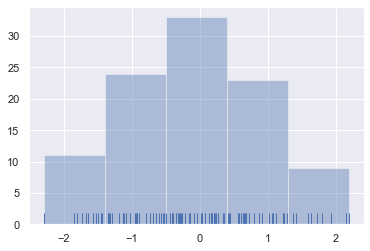

In [7]:
sns.distplot(x, bins=5, kde=False, rug=True);

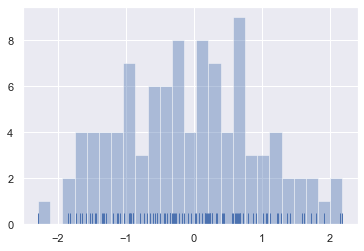

In [8]:
sns.distplot(x, bins=25, kde=False, rug=True);

#### 核密度估计Kernel density estimation

核密度估计是一种分布的平滑（smooth）方法，所谓核密度估计，就是采用平滑的峰值函数(“核”)来拟合观察到的数据点，从而对真实的概率分布曲线进行模拟。

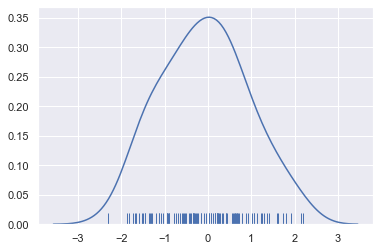

In [9]:
sns.distplot(x, hist=False, rug=True,kde = True);

那么，我们是符合得到这样一条曲线的呢？  实际上，我们将每一个数据点用一个以其为中心的高斯分布曲线代替，然后将这些高斯分布曲线叠加得到的。

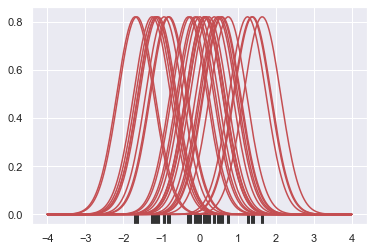

In [10]:
x = np.random.normal(0, 1, size=30)   # 生成中心在0，scale为1，30维的正态分布数据 
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.) # 确定带宽
support = np.linspace(-4, 4, 200)  
kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")
sns.rugplot(x, color=".2", linewidth=3);

将每一个数据转化为以其为中心的正态分布曲线以后，将其叠加，然后归一化，即可得到最终的KDE曲线。

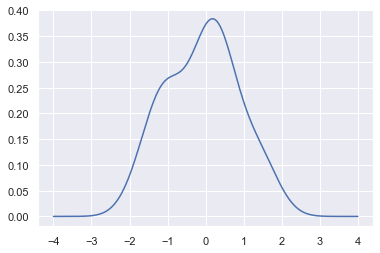

In [11]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
density /= trapz(density, support) # 使用梯形积分计算曲线下面积，然后归一化
plt.plot(support, density);

我们可以通过观察，发现，使用seaborn中的`kdeplot()`我们会得到同样的曲线，或者使用`distplot(kde = True)`也有同样的效果。

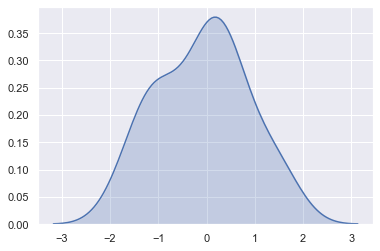

In [12]:
sns.kdeplot(x, shade=True);

除了核函数，另一个影响KDE的参数是带宽(h)。带宽反映了KDE曲线整体的平坦程度，也即观察到的数据点在KDE曲线形成过程中所占的比重 — 带宽越大，观察到的数据点在最终形成的曲线形状中所占比重越小，KDE整体曲线就越平坦；带宽越小，观察到的数据点在最终形成的曲线形状中所占比重越大，KDE整体曲线就越陡峭。

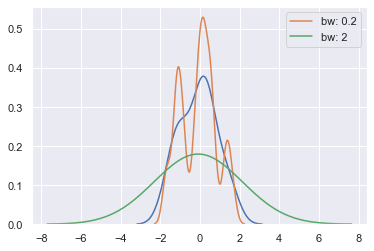

In [13]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

通过观察以上的图像我们可以发现，由于高斯分布的引入，我们往往会扩大了变量的取值范围，我们可以通过`cut`参数控制最终图像距离最小值和最大值的距离。需要注意的是，`cut`参数仅仅是改变了图像的展示方法，对kde的计算过程没有影响。

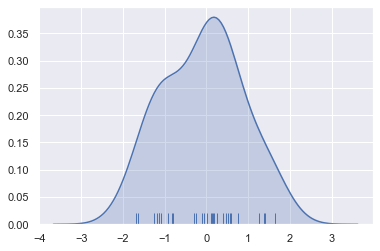

In [14]:
sns.kdeplot(x, shade=True, cut=4)
sns.rugplot(x);

#### 参数分布的拟合

我们也可以使用`displot()`拟合参数分布，并且将拟合结果与实际数据的分布做对比。

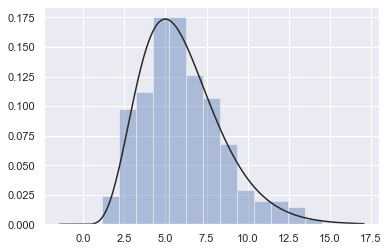

In [15]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma); # 是用gamma分布拟合，并可视化

### 绘制两变量之间的联合分布

有的时候，我们在数据分析的时候，也会关系两个变量之间的联合概率分布关系。seaborn中给我们提供了一个非常方便的`jointplot()`函数可以实现该功能。

In [16]:
mean = [0, 1]
cov = [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

In [17]:
df.head()

,x,y
0,-0.638577,2.075673
1,1.243532,2.497982
2,-0.743366,1.032257
3,1.870233,0.238657
4,-1.069229,-0.940122


#### 散点图

我们最熟悉的绘制联合分布的方法莫过于散点图了。`jointplot()`会返回一张散点图（联合分布），并在上方和右侧展示两个变量各自的单变量分布。

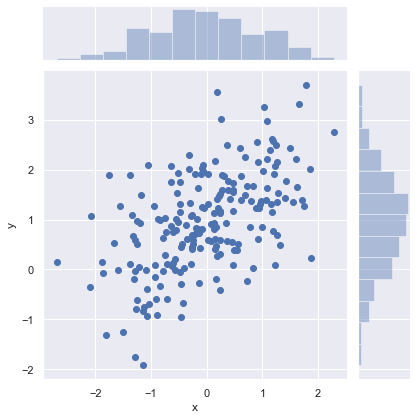

In [18]:
sns.jointplot(x="x", y="y", data=df);

#### Hexbin plots

与一维柱状图对应的二维图像称之为Hexbin plots，该图像帮助我们统计位于每一个六边形区域的数据的个数，然后用颜色加以表示，这种方法尤其对于大规模的数据更为适用。

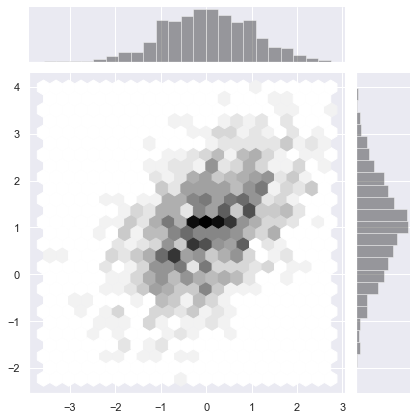

In [19]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
sns.jointplot(x=x, y=y, kind="hex", color="k");
# with sns.axes_style("white"):
#     sns.jointplot(x=x, y=y, kind="hex", color="k");

该方法尤其适用于白色风格

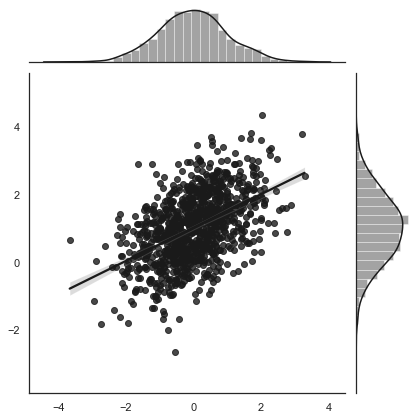

In [20]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="reg", color="k");

#### 联合分布的核密度估计

类似于一维情况，我们在二维平面一样可以进行核密度估计。通过设置`kind = 'kde'`，我们就可以得到一个核密度估计的云图，以及两个单变量的核密度估计曲线。

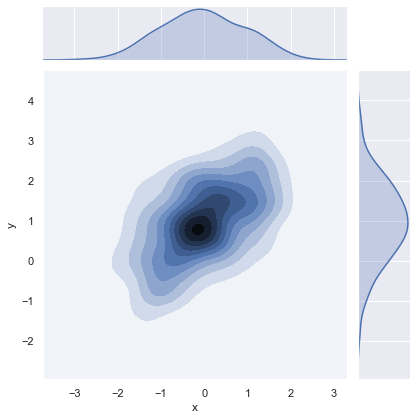

In [21]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

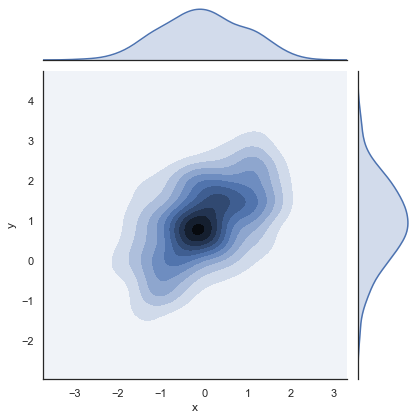

In [22]:
with sns.axes_style("white"):
    sns.jointplot(x="x", y="y", data=df, kind="kde");

我们也可以直接使用`kdeplot()`绘制二维平面上的核密度估计。而且，结合面向对象的方法，我们还可以把新的绘图加入到已有的图片上。

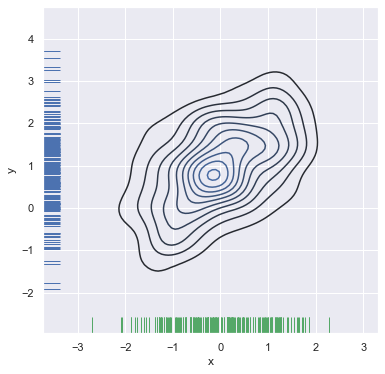

In [23]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

If you wish to show the bivariate density more continuously, you can simply increase the number of contour levels:

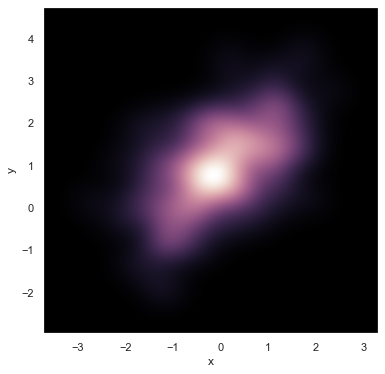

In [24]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=509, shade=True);

我们还可以给图片添加新的图层，将数据的散点图绘制在原图上，包括给图片添加坐标轴标签等等。

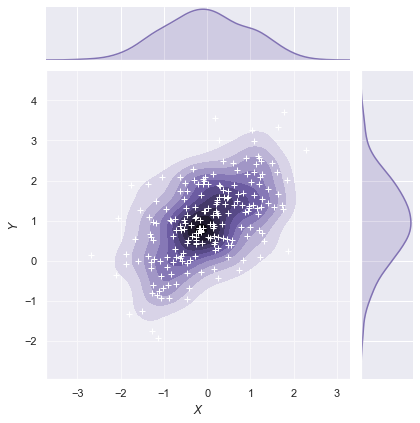

In [25]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0.5)
g.set_axis_labels("$X$", "$Y$");

## 分组可视化

借助于上述的双变量分布绘图方法，我们可以绘制多变量两两之间的联合分布，seaborn中实现这个功能的函数为`pairplot()`，该函数会返回一个方形的绘图窗口，在该窗口中绘制两两变量之间的关系。在对角线上，`pairplot()`会展示单变量分布。

In [26]:
# iris = sns.load_dataset('iris')
# sns.pairplot(iris);

### 可视化线性关系

许多数据集都包含了众多变量，有的时候我们希望能够将其中的一个或者几个联系起来。上一节我们讲到了seaborn中很多绘制联合分布的方法，比如`jointplot()`，本节我们进一步地，讨论变量之间线性关系的可视化。

需要注意的是，seaborn并不是一个统计学的库，seaborn想要实现的是：通过运用简单的统计工具，尽可能简单而直观地给我们呈现出数据之间相互关系。有的时候，对数据有一个直观的认识，能帮助我们更好地建立模型。

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
sns.set(color_codes=True)

#### 绘制线性回归的函数

在seaborn中，有两个函数经常被用于实现线性回归，他们是`lmplot`和`regplot`。接下来我们会介绍这两个函数的异同。

在最简单的情况下，两个函数均会返回一个散点图，并给出$y$关于$x$的线性回归方程以及一个95%的置信区间。

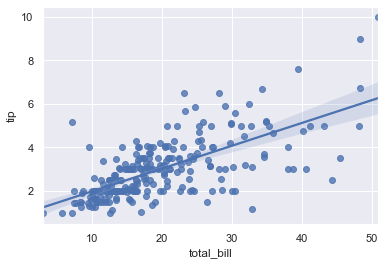

In [29]:
sns.regplot(x="total_bill", y="tip", data=tips);

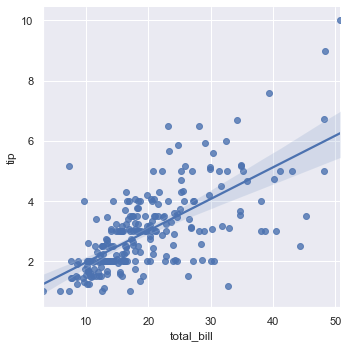

In [30]:
sns.lmplot(x="total_bill", y="tip", data=tips);

我们发现，除了图的尺寸，这两个图的内容是完全一致的。

那么，这两个函数有什么不同呢？

- `regplot()`能接受更多种形式的数据，例如numpy arrays, pandas Series, references to variables in a pandas DataFrame，而 `lmplot()`只能接受references to variables in a pandas DataFrame，也就是只能接受“tidy” data
- `regplot()` 仅仅指出 `lmplot()`的一部分参数

我们可以对一个离散变量和一个连续变量绘制线性回归线，不过，可视化结果往往是不尽如人意的。

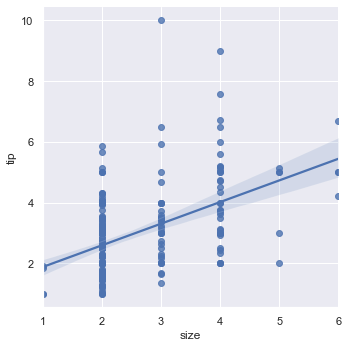

In [31]:
sns.lmplot(x="size", y="tip", data=tips);

针对上面这个图像，一个选择是给每一个离散的变量增加一个随机的扰动`jitter`，使得数据的分布更容易观察，请注意，`jitter`参数的存在仅仅是改变了可视化的效果，不会影响线性回归方程。

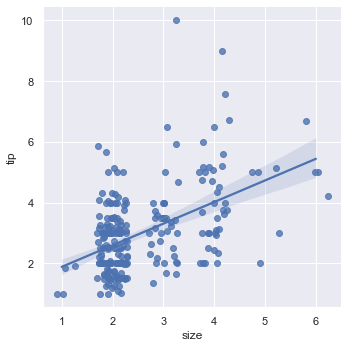

In [32]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.3);

另一个选择是，我们直接将每一个离散类别中的所有数据统一处理，得到一个综合的趋势以及每个数据点对应的置信区间。

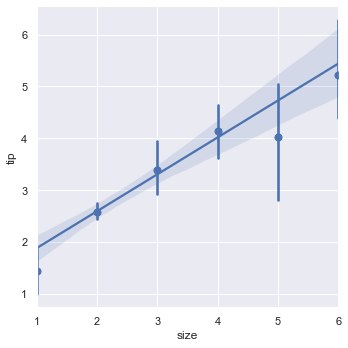

In [33]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

#### 拟合其他形式的模型

简单的线性拟合非常容易操作，也很容易理解。但是真实的数据往往不一定是线性相关的，因此我们需要考虑更多的拟合方法。

我们这里使用的是 The Anscombe’s quartet dataset，在这个数据集中，不同形式的数据会得到同样的一个回归方程，但是拟合效果却是不同的。

首先我们来看第一个

In [34]:
anscombe = sns.load_dataset("anscombe")
# anscombe = pd.read_csv('/home/kesci/input/Seaborn_Demo6897/anscombe.csv')

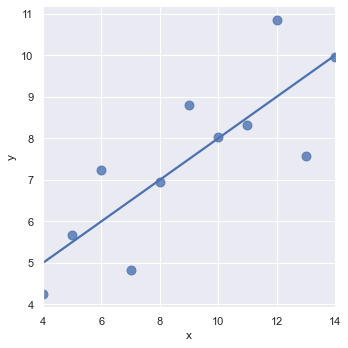

In [35]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

我们接着来看第二个线性拟合，其拟合方程和第一个模型是一样的，但是显然其拟合效果并不好。

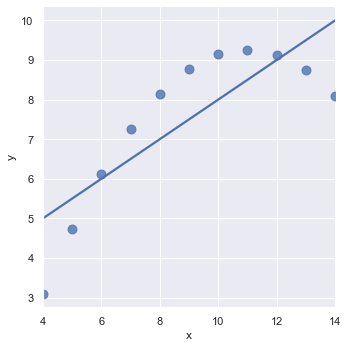

In [36]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

我们可以给`lmplot()`传入一个`order`参数，修改数据拟合的阶次，进而可以拟合非线性趋势。

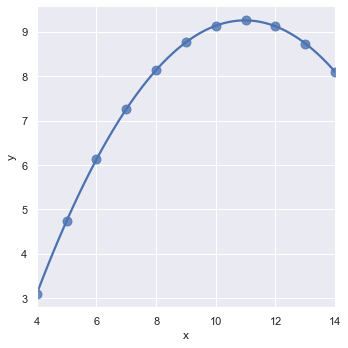

In [37]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

接着我们来看第三个例子，在这个案例中，我们引入了一个离群点，由于离群点的存在，其拟合方程显然偏离了主要趋势。

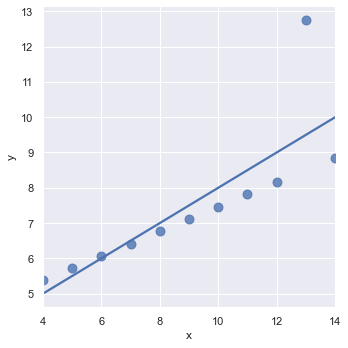

In [38]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

此时我们可以通过引入`robust`参数增强拟合的稳定性，该参数设置为True的时候，程序会自动忽略异常大的残差。

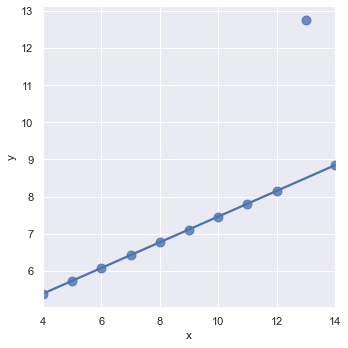

In [39]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

当y参数传入了二分数据的时候，线性回归也会给出结果，但是该结果往往是不可信的。

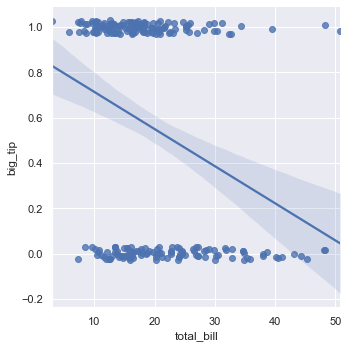

In [40]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

可以考虑采取的一个方法是引入逻辑回归，从而回归的结果可以用于估计在给定的$x$数据下，$y=1$的概率

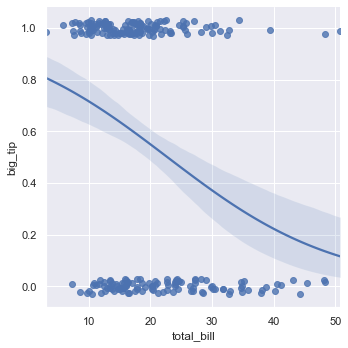

In [41]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

请注意，相比如简单的线性回归，逻辑回归以及robust regression 计算量较大，同时，置信区间的计算也会涉及到bootstrap，因此如果我们想要加快计算速度的话，可以把bootstrap关掉。

其他拟合数据的方法包括非参数拟合中的局部加权回归散点平滑法(LOWESS)。LOWESS 主要思想是取一定比例的局部数据，在这部分子集中拟合多项式回归曲线，这样我们便可以观察到数据在局部展现出来的规律和趋势。

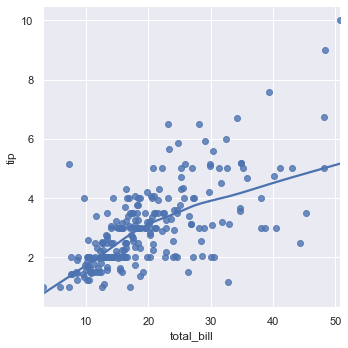

In [42]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

使用`residplot()`，我们可以检测简单的线性回顾是否能够比较好地拟合原数据集。 理想情况下，简单线性回归的残差应该随机地分布在$y=0$附近。

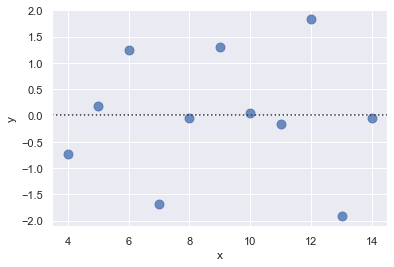

In [43]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

如果出现了如下图所示的残差图，则说明线性回归的效果并不好。

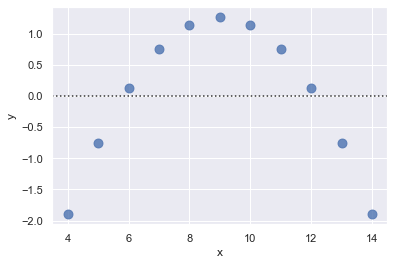

In [44]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

#### 引入第三个参数

我们知道，线性回归可以帮助我们描述两个变量之间的关系。不过，一个跟有趣的问题是：“这两个变量之间的关系是否跟第三个因素有关呢？”

这时`regplot()`和`lmplot()`就有区别了。`regplot()`只能展示两个变量之间的关系，而`lmplot()`则能进一步地引入第三个因素（categorical variables）。

我们可以通过不同的颜色来区分不同的类别，在同一张图中绘制多个线性回归曲线：

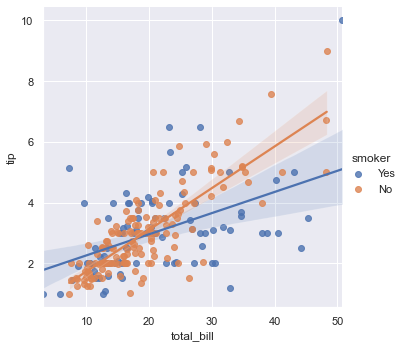

In [45]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

除了颜色之外，为了观察和打印方便，我们还可以引入不同的图形标记，区分不同的类别。

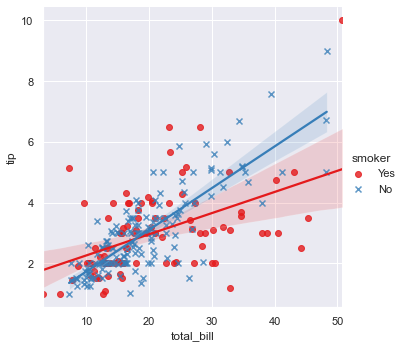

In [46]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

To add another variable, you can draw multiple “facets” which each level of the variable appearing in the rows or columns of the grid:

如果我们想进一步地增加维度（变成四维绘图甚至五维），我们可以增加一个`col`参数。

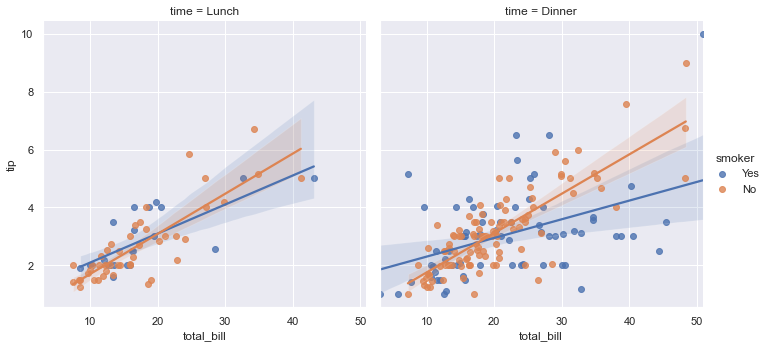

In [47]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

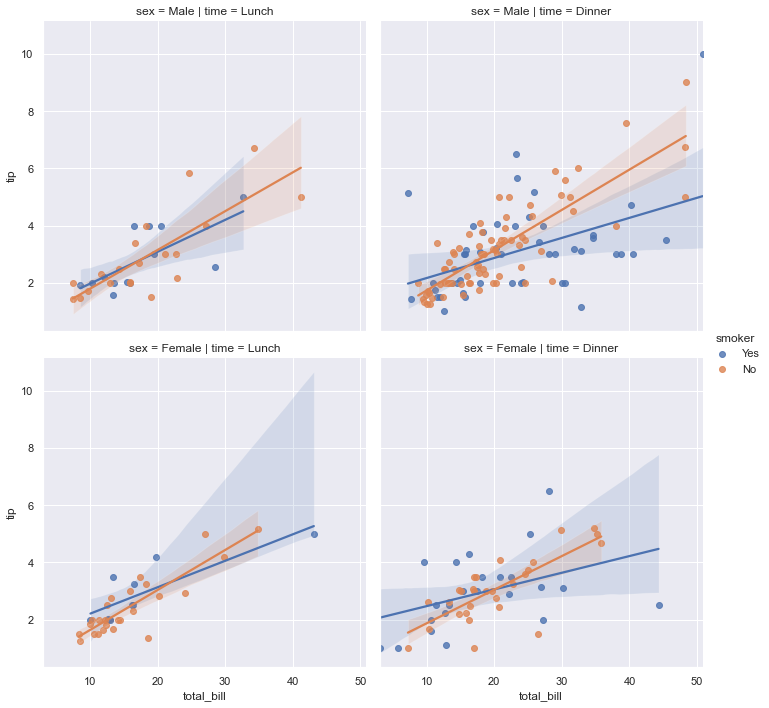

In [48]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

## 调整绘图的尺寸和形状

前面我们注意到了，`regplot`和`lmplot`做出的图像基本类似，但是在图像的尺寸和形状上有所区别。

这是因为，`regplot`的绘图，是图层层面的绘图，这意味着我们可以同时对多个图层进行操作，然后对每个图层进行精细化的格式设置。为了控制图片尺寸，我们必须先生成一个固定尺寸的对象。

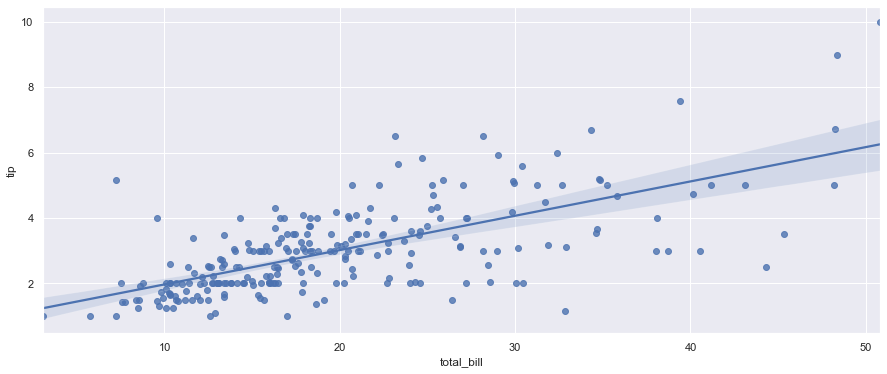

In [49]:
f, ax = plt.subplots(figsize=(15, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

与`regplot`不同的是，`lmplot`是一个集成化的命令，如果我们想要修改图片的尺寸和大小，只能通过传入参数的格式进行实现，`size`和`aspect`分别用来控制尺寸和长宽比。

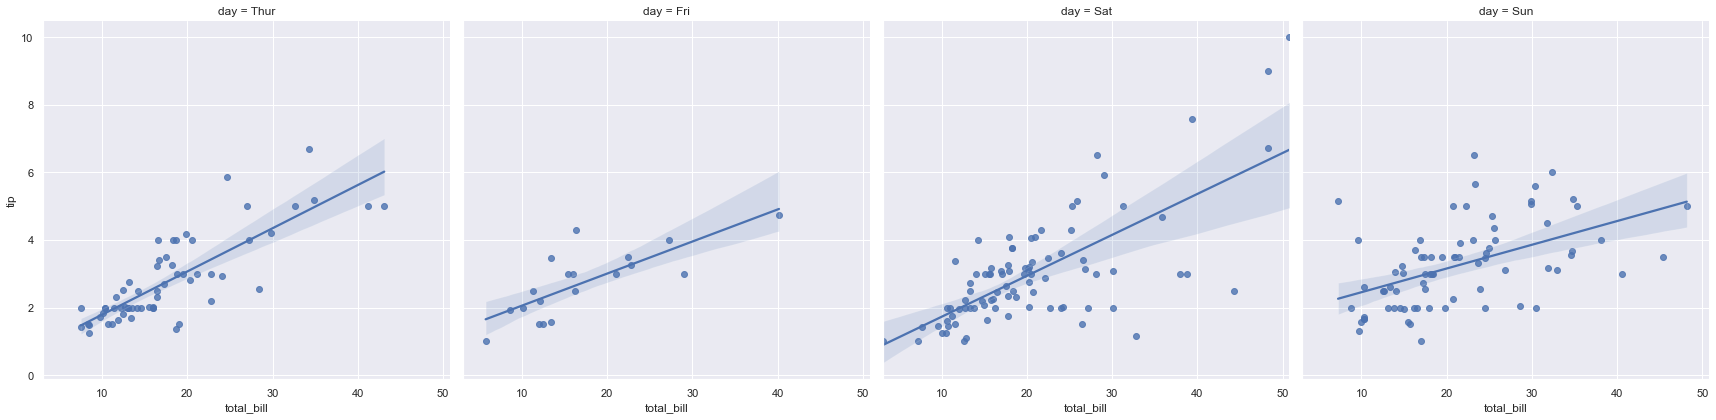

In [50]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,height=6);

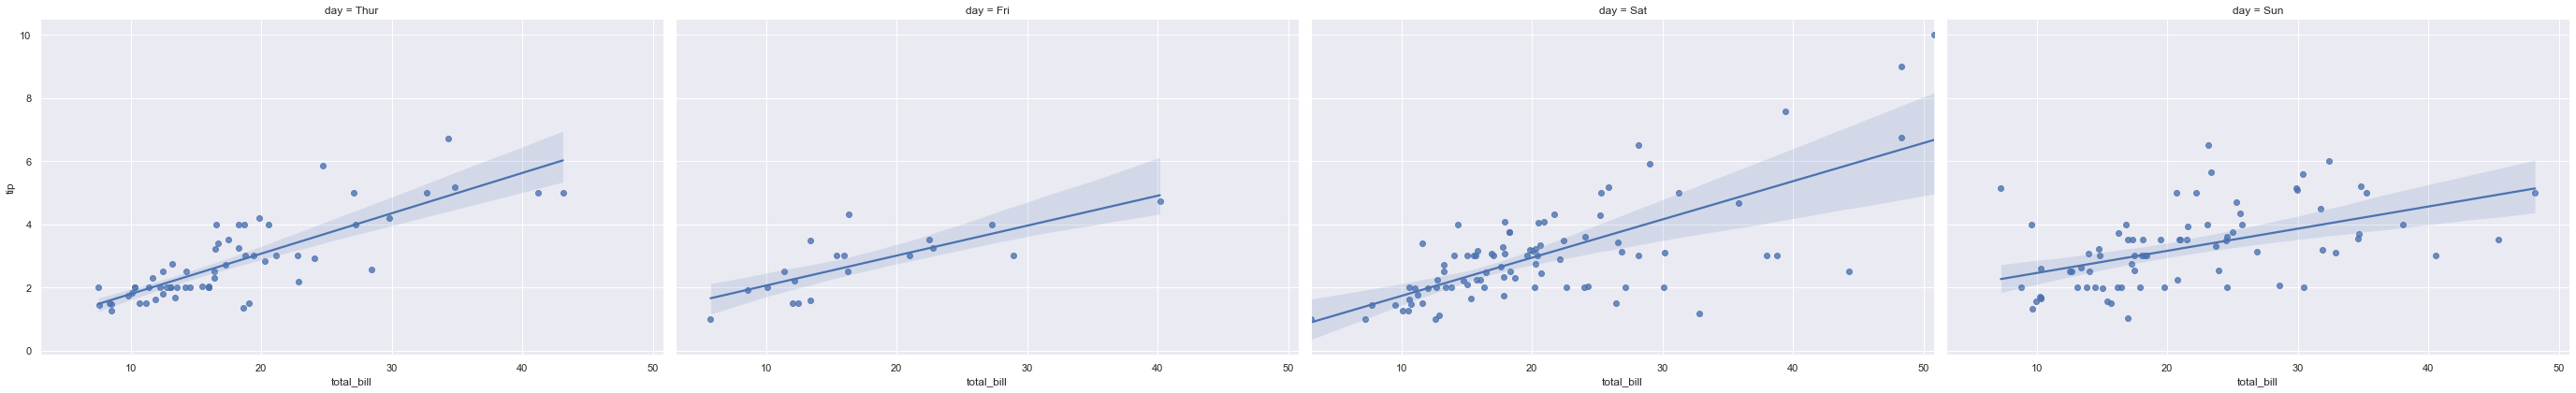

In [51]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,height=6,
           aspect=1.6);

## 修改绘图风格

In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

让我们来定义一簇简单的正弦曲线，然后观察一下不同的绘图风格的区别。

In [53]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

这是matplotlib默认风格：

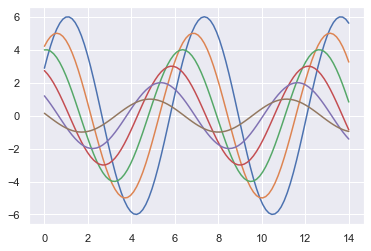

In [54]:
sinplot()

现在我们切换成seaborn默认风格。

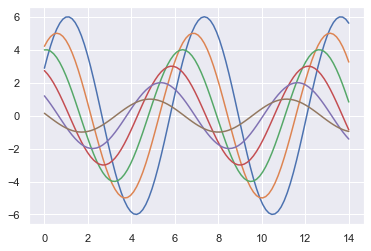

In [55]:
sns.set()
sinplot()

(Note that in versions of seaborn prior to 0.8, set() was called on import. On later versions, it must be explicitly invoked).

Seaborn 把matplotlib中的参数分为了两类。其中第一类用来调整图片的风格（背景、线型线宽、字体、坐标轴等），第二类用来根据不同的需求微调绘图格式（图片用在论文、ppt、海报时有不同的格式需求。）

画出令人赏心悦目的图形，是数据可视化的目标之一。我们知道，数据可视化可以帮助我们向观众更加直观的展示定量化的insight， 帮助我们阐述数据中蕴含的道理。除此之外，我们还希望可视化的图表能够帮助引起读者的兴趣，使其对我们的工作更感兴趣。


Matplotlib给了我们巨大的自由空间，我们可以根据自己的需要，任意调整图像的风格。然而，为了绘制一张上述的“令人赏心悦目”的图片，往往需要长期的绘图经验。这对新手来说时间成本无疑是非常高的。为此，seaborn也给我们集成好了一些设置好的绘图风格，使用这些内置风格，我们就能“傻瓜式”地获得美观的绘图风格。

### Seaborn 绘图风格

在seaborn中，有五种预置好的绘图风格，分别是：`darkgrid`, `whitegrid`, `dark`, `white`和` ticks`。其中`darkgrid`是默认风格。


用户可以根据个人喜好和使用场合选择合适的风格。例如，如果图像中数据非常密集，那么使用`white`风格是比较合适的，因为这样就不会有多于的元素影响原始数据的展示。再比如，如果看图的读者有读数需求的话，显然带网格的风格是比较好的，这样他们就很容易将图像中的数据读出来。

In [56]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

先来看`whitegrid`风格

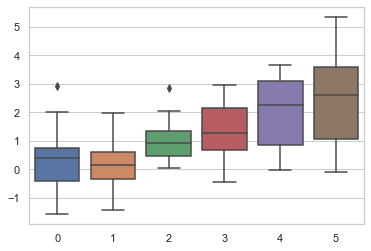

In [57]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

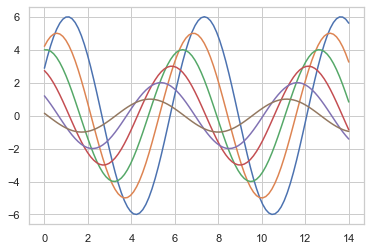

In [58]:
sns.set_style("whitegrid")
sinplot()

在很多场合下（比如ppt展示时，用户不会详细读数据，而主要看趋势），用户对网格的需求是不大的，此时我们可以去掉网格。

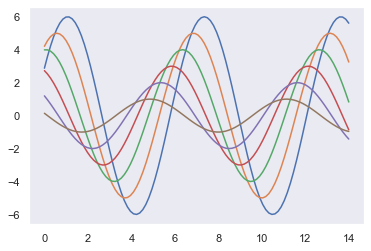

In [59]:
sns.set_style("dark")
sinplot()

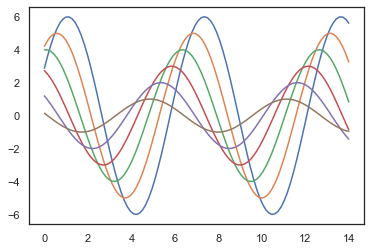

In [60]:
sns.set_style("white")
sinplot()

ticks风格介于grid风格与完全没有grid的风格之间，坐标轴上提供了刻度线。

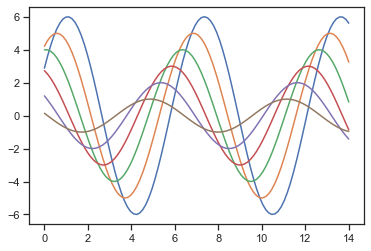

In [61]:
sns.set_style("ticks")
sinplot()

### 移除侧边边界线

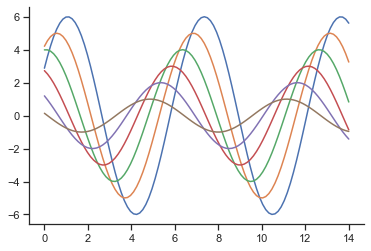

In [62]:
sinplot()
sns.despine()

当然，左侧和下方的线也是可以移除的。

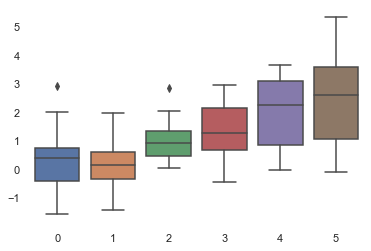

In [63]:
sns.set_style("white")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True,bottom=True)

### 自定义seaborn styles

当然了，如果这五种seaborn自带风格也不能满足你的需求，你还可以自行设置自己的风格，可以设置的参数有：

In [64]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

设置的方法如下：

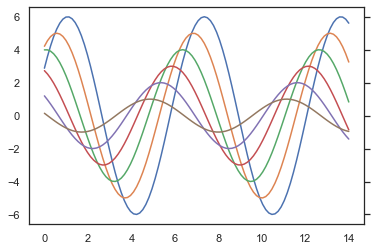

In [65]:
sns.set_style("white", {"ytick.right": True,'axes.grid':False})
sinplot()